# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import bagging
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
import joblib

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#importing data that is ready for processing

%store -r cdc

pd.set_option('display.max_columns', 500)

cdc.head()

,age,sex,race,martial,weight,height,overweight,education,income,home,employment,health,binge,coverage,checkup,primaryphysician,exercise,heavyalcohol,smoker,any_alcohol,sleep_avg,heart_dis,cancer,depression,stroke,diabete3,asthma3,heart_attack,skin_cancer,chronic_bronchitis,kidney_disease,arthritis,bmi,obese
0,80.0,2.0,1.0,3.0,130.0,64.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,22.312012,0
1,33.0,2.0,2.0,4.0,200.0,65.0,0.0,4.0,0.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.278107,1
2,76.0,2.0,1.0,3.0,142.0,58.0,0.0,2.0,0.0,1.0,0.5,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.674792,0
3,66.0,1.0,1.0,2.0,190.0,70.0,0.0,2.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.259184,0
5,80.0,2.0,1.0,3.0,172.0,62.0,0.0,3.0,99.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,31.455775,1


In [3]:
#a Subset of all the chronic conditions to create a feature that identifys individuals with 
#comorbidity(individuals with 2 or more chronic conditions)

subset = cdc[['heart_dis', 'cancer' , 'stroke', 'diabete3',  'heart_attack', 
             'chronic_bronchitis', 'kidney_disease', 'arthritis']]

#adding the values of each of the independent variable to identify participants with more than one chronic condition 
#after adding the values, if the sum was greater than two, the comorbid value will be assigned the value of one
cdc['comorbid'] = subset.sum(axis=1)
cdc['comorbid'] = np.where(cdc['comorbid']>=2, 1, 0)

In [4]:
cdc['chronic'] = subset.sum(axis=1)
cdc['chronic'] = np.where(cdc['chronic']>=1, 1, 0)

In [5]:
cdc.chronic.value_counts(normalize=True)

1    0.508575
0    0.491425
Name: chronic, dtype: float64

In [6]:
cdc.head()

,age,sex,race,martial,weight,height,overweight,education,income,home,employment,health,binge,coverage,checkup,primaryphysician,exercise,heavyalcohol,smoker,any_alcohol,sleep_avg,heart_dis,cancer,depression,stroke,diabete3,asthma3,heart_attack,skin_cancer,chronic_bronchitis,kidney_disease,arthritis,bmi,obese,comorbid,chronic
0,80.0,2.0,1.0,3.0,130.0,64.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,22.312012,0,0,1
1,33.0,2.0,2.0,4.0,200.0,65.0,0.0,4.0,0.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.278107,1,0,0
2,76.0,2.0,1.0,3.0,142.0,58.0,0.0,2.0,0.0,1.0,0.5,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.674792,0,1,1
3,66.0,1.0,1.0,2.0,190.0,70.0,0.0,2.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.259184,0,0,0
5,80.0,2.0,1.0,3.0,172.0,62.0,0.0,3.0,99.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,31.455775,1,1,1


# Logistic Regression

In [7]:
#scaling data to put data points on a scale of zero to one
scaler = MinMaxScaler()
cdc_new = scaler.fit_transform(cdc)


In [8]:
cdc_new= pd.DataFrame(cdc_new)

cdc_new.round(2)
cdc_new.columns=cdc.columns

cdc_new.head()

,age,sex,race,martial,weight,height,overweight,education,income,home,employment,health,binge,coverage,checkup,primaryphysician,exercise,heavyalcohol,smoker,any_alcohol,sleep_avg,heart_dis,cancer,depression,stroke,diabete3,asthma3,heart_attack,skin_cancer,chronic_bronchitis,kidney_disease,arthritis,bmi,obese,comorbid,chronic
0,1.000000,1.0,0.0,0.666667,0.085763,0.422222,1.0,1.000000,0.010101,1.0,1.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.260870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.131337,0.0,0.0,1.0
1,0.241935,1.0,0.2,1.000000,0.205832,0.444444,0.0,1.000000,0.000000,0.0,1.0,0.5,0.0,0.0,0.333333,1.0,1.0,0.0,1.0,1.0,0.173913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231763,1.0,0.0,0.0
2,0.935484,1.0,0.0,0.666667,0.106346,0.288889,0.0,0.333333,0.000000,1.0,0.5,1.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.260870,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198764,0.0,1.0,1.0
3,0.774194,0.0,0.0,0.333333,0.188679,0.555556,0.0,0.333333,0.000000,1.0,0.5,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176642,0.0,0.0,0.0
4,1.000000,1.0,0.0,0.666667,0.157804,0.377778,0.0,0.666667,1.000000,1.0,0.5,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.217391,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.215074,1.0,1.0,1.0


In [9]:
%store cdc_new

Stored 'cdc_new' (DataFrame)


In [20]:
#selecting the target and independent variables

#independent variables
X = cdc_new.drop(['chronic', 'heart_dis', 'cancer', 'stroke', 'diabete3', 'asthma3',
              'heart_attack', 'skin_cancer', 'chronic_bronchitis', 'kidney_disease', 
              'arthritis', 'comorbid', 'arthritis', 'depression',
               
             'heavyalcohol', 'income', 'race', 'height', 'binge', 'coverage', 'martial',
                  'overweight', 'obese', 'education', 'home', 'exercise'
              
            
              ], axis=1)
#'heart_attack'
#target variable
y = cdc_new.chronic
X.head()

,age,sex,weight,employment,health,checkup,primaryphysician,smoker,any_alcohol,sleep_avg,bmi
0,1.000000,1.0,0.085763,1.0,0.0,0.000000,1.0,0.0,0.0,0.260870,0.131337
1,0.241935,1.0,0.205832,1.0,0.5,0.333333,1.0,1.0,1.0,0.173913,0.231763
2,0.935484,1.0,0.106346,0.5,1.0,0.000000,1.0,0.0,0.0,0.260870,0.198764
3,0.774194,0.0,0.188679,0.5,0.0,0.000000,1.0,0.0,0.0,0.217391,0.176642
4,1.000000,1.0,0.157804,0.5,0.0,0.000000,1.0,0.0,0.0,0.217391,0.215074


In [21]:
#Spliting data in to training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)


#instantiating logistic regression model

log_reg = LogisticRegression()

#fiting logistic regression to training data

log_model = log_reg.fit(X_train, y_train)

In [22]:
# #saving the model 
# with open("log_model.pkl","wb") as logistic_model:
    
#      joblib.dump(log_model,logistic_model, compress=8)
    

In [23]:
#acuracy score for the logistic regression model

log_model.score(X_test, y_test)

0.7673236181549721

In [24]:
#coefficients of the model

coef = log_model.coef_.flatten()

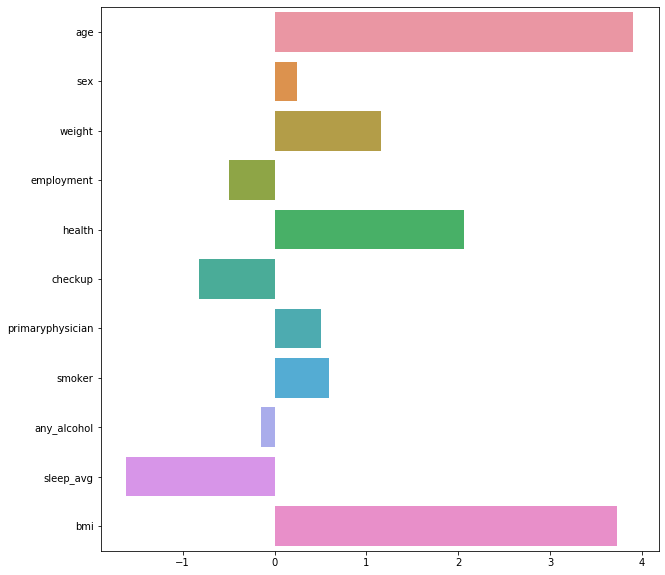

In [25]:
#Plotting a barplot to visualize coefficients of the regression model and their importance

plt.figure(figsize=(10,10))
sns.barplot(coef, X_train.columns)

# A negative coefficient suggests that as the independent variable increases,
# the dependent variable tends to decrease. 

In [40]:
#importing confusion matrix and crossvalidation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import cross_val_score

In [41]:
print(cross_val_score(log_model, X_train, y_train, scoring='accuracy', cv = 3).mean()*100)


76.48456088177481


In [42]:
pred = log_model.predict(X_test)

#Confusion matrix and classification report
log_confusion = confusion_matrix(y_test, pred, normalize='true')
class_report = classification_report(y_test, pred)
print(log_confusion)
print(class_report)

[[0.74741418 0.25258582]
 [0.2137495  0.7862505 ]]
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76     38189
         1.0       0.76      0.79      0.77     39696

    accuracy                           0.77     77885
   macro avg       0.77      0.77      0.77     77885
weighted avg       0.77      0.77      0.77     77885



In [43]:
log_classes = log_model.classes_

In [44]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (11,7), fontsize=19):
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize )
    try:
        heatmap = sns.heatmap(df_cm, annot=True, cmap='YlGnBu')
        sns.set(font_scale=2)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
    plt.ylabel('True label', fontsize=13)
    plt.xlabel('Predicted label', fontsize=13)
    
    return fig

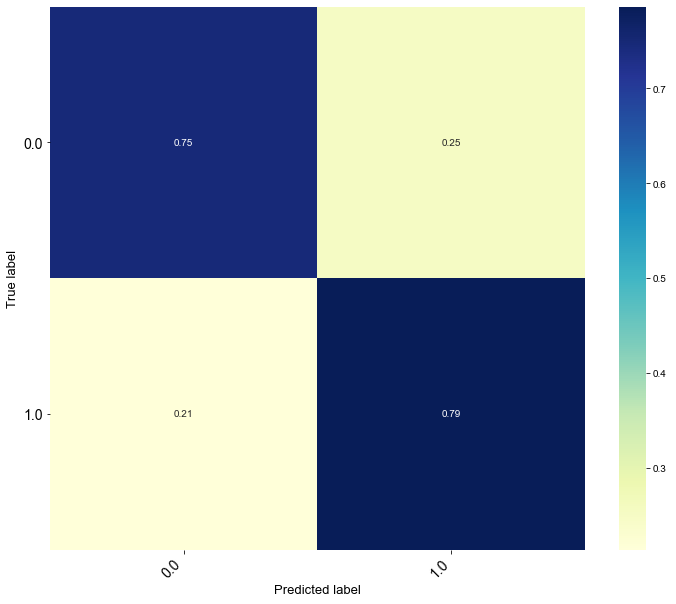

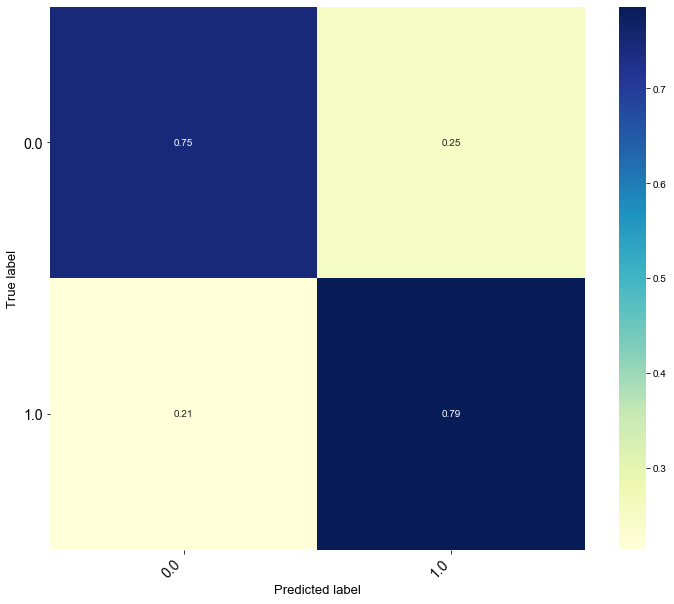

In [45]:
print_confusion_matrix(log_confusion, log_classes, figsize =(12,10), fontsize=14)

#true positive = 5244  false positive = 4946
#false negativ = 2601   True negative = 14435

# Mean Shift Clustering 

In [46]:
# from sklearn.cluster import MeanShift
# from mpl_toolkits.mplot3d import Axes3D

In [47]:
from sklearn.cluster import KMeans

In [48]:
k_means = KMeans(n_clusters = 4)
k_means.fit(X_train)
y_hat = k_means.predict(X_train)
labels = k_means.labels_

In [49]:
# from sklearn import metrics
# labels = k_means.labels_

# metrics.silhouette_score(X_train, labels, metric='euclidean')

In [50]:
X_train['y_hat'] = y_hat


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


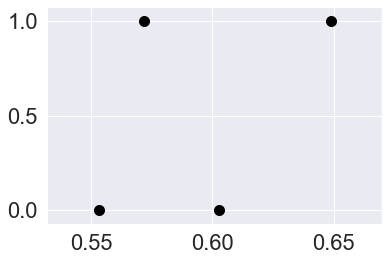

In [51]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c = y_hat, s = 25)
cl_centers = k_means.cluster_centers_

plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100);

In [52]:
X_train.head()

,age,sex,weight,employment,health,checkup,primaryphysician,exercise,smoker,any_alcohol,sleep_avg,bmi,y_hat
135244,0.709677,0.0,0.162950,1.0,0.00,0.0,1.0,1.0,0.5,1.0,0.260870,0.144338,2
87353,0.983871,1.0,0.085763,0.5,0.00,0.0,1.0,1.0,0.0,0.0,0.260870,0.144732,3
269214,0.645161,0.0,0.205832,1.0,0.50,0.0,1.0,1.0,0.0,1.0,0.304348,0.205466,2
140080,0.951613,1.0,0.068611,0.5,0.00,0.0,1.0,1.0,0.0,1.0,0.173913,0.141606,0
78814,0.645161,1.0,0.085763,0.0,0.75,0.0,1.0,1.0,0.5,1.0,0.304348,0.151929,0


In [53]:
group_0 = X_train.loc[y_hat==0]
group_0.describe()

,age,sex,weight,employment,health,checkup,primaryphysician,exercise,smoker,any_alcohol,sleep_avg,bmi,y_hat
count,79454.000000,79454.0,79454.000000,79454.000000,79454.000000,79454.000000,79454.000000,79454.000000,79454.000000,79454.0,79454.000000,79454.000000,79454.0
mean,0.571856,1.0,0.140140,0.692017,0.233383,0.092343,0.872958,0.814811,0.275682,1.0,0.263228,0.176936,0.0
std,0.274679,0.0,0.066179,0.380087,0.302922,0.226680,0.333022,0.388453,0.361533,0.0,0.058040,0.057234,0.0
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.031042,0.0
25%,0.354839,1.0,0.094340,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.217391,0.136358,0.0
50%,0.596774,1.0,0.128645,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.260870,0.164040,0.0
75%,0.790323,1.0,0.171527,1.000000,0.500000,0.000000,1.000000,1.000000,0.500000,1.0,0.304348,0.204426,0.0
max,1.000000,1.0,0.850772,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.948567,0.0


In [54]:
group_1 = X_train.loc[y_hat==1]
group_1.describe()

,age,sex,weight,employment,health,checkup,primaryphysician,exercise,smoker,any_alcohol,sleep_avg,bmi,y_hat
count,58228.000000,58228.0,58228.000000,58228.000000,58228.000000,58228.000000,58228.000000,58228.000000,58228.000000,58228.0,58228.000000,58228.000000,58228.0
mean,0.602593,0.0,0.206016,0.648700,0.372304,0.120125,0.799169,0.715377,0.309799,0.0,0.262460,0.190418,1.0
std,0.286995,0.0,0.080428,0.384163,0.344073,0.273096,0.400626,0.451238,0.367164,0.0,0.070533,0.056928,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.026358,1.0
25%,0.403226,0.0,0.154374,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.217391,0.151166,1.0
50%,0.661290,0.0,0.193825,0.500000,0.500000,0.000000,1.000000,1.000000,0.000000,0.0,0.260870,0.182288,1.0
75%,0.838710,0.0,0.248714,1.000000,0.500000,0.000000,1.000000,1.000000,0.500000,0.0,0.304348,0.218851,1.0
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.904995,1.0
